# Library and Function Needed

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # if u want to learn regex [https://regex101.com/]
from tqdm import tqdm # A Fast, Extensible Progress Bar - Library for creating progress bars to monitor the progress of iterations or tasks.
import string
import os
import missingno as msno
import random # Random number generators - Library for generating random numbers, selecting random elements, shuffling sequences, etc.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [2]:
from sklearn.metrics import (
    precision_score, # Precision score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total predicted positives.
    recall_score, # Recall score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total actual positives.
    f1_score, # F1 score - Harmonic mean of precision and recall, a metric for evaluating classification models.
    classification_report, # Classification report - Summary of the precision, recall, F1 score, and support for each class in a classification problem.
    accuracy_score # Accuracy score - Metric for evaluating classification models, measuring the proportion of correct predictions to the total number of predictions.
)

In [3]:
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)


def check_duplicates(dataframe):
    """
    Memeriksa nilai duplikat dari DataFrame.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Jumlah Duplikat data: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def basic_data_info(dataframe):
    """
    Menampilkan informasi dasar dari DataFrame.
    """
    # Menampilkan lima baris pertama DataFrame
    print("Preview Data:")
    print("---------------------------")
    display(dataframe.head())

    # Menampilkan info umum DataFrame
    print("\nInformasi Umum:")
    print("---------------------------")
    print(dataframe.info())

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print("---------------------------")
    display(dataframe.describe())

# Fetching Kaggle Dataset

## Set-up Env Variable for kaggle Config

In [4]:
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis'

# # Tentukan path untuk menyimpan dataset
# path_to_save = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis/Dataset/'

# # Buat direktori jika belum ada
# os.makedirs(path_to_save, exist_ok=True)

In [5]:
# # Unduh dataset menggunakan perintah kaggle
# !kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data -p '{path_to_save}'

In [6]:
# # Ekstrak dataset
# !unzip '{path_to_save}/new-york-city-airbnb-open-data.zip' -d '{path_to_save}'

# # Hapus file zip jika diperlukan
# os.remove(f'{path_to_save}/new-york-city-airbnb-open-data.zip')

# Load Dataset

In [7]:
dataPath = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis/Dataset/'

df = pd.read_csv(dataPath + "AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Simple Explore Dataset

In [8]:
print("Shape of DataFrame: ",df.shape)

Shape of DataFrame:  (48895, 16)


In [9]:
basic_data_info(df)

Preview Data:
---------------------------


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



Informasi Umum:
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
check_duplicates(df)

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [11]:
missing_data(df)

,Total,Percent
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


<Axes: >

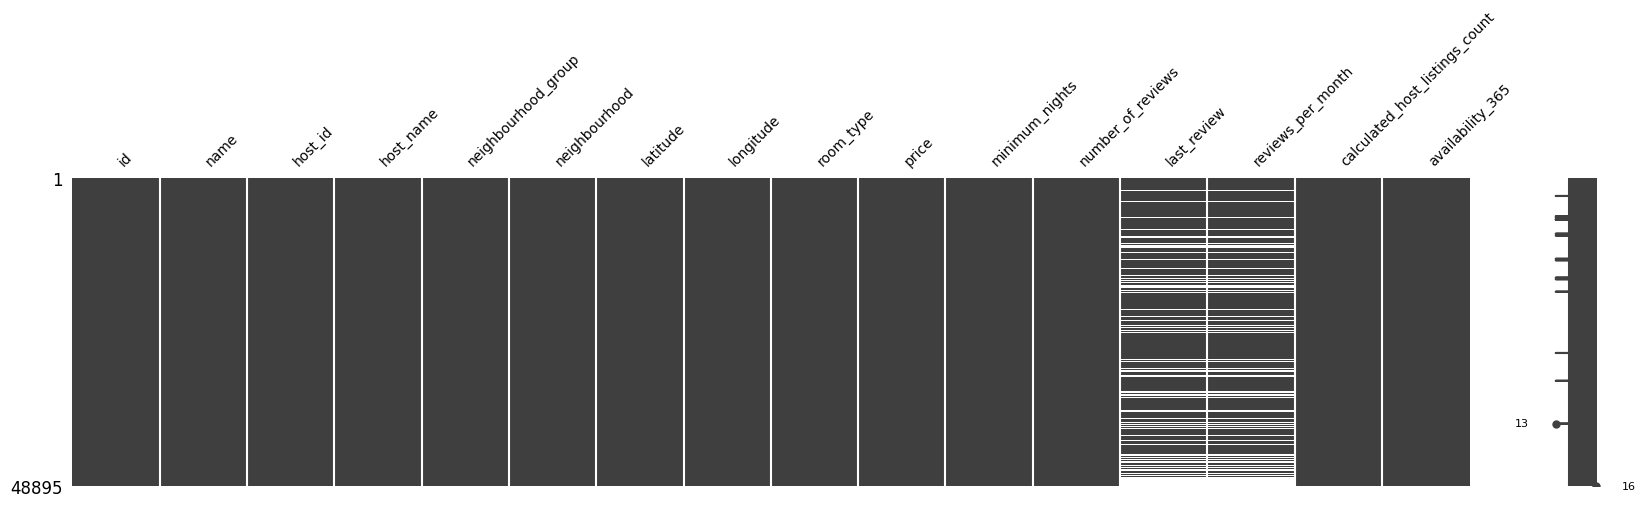

In [12]:
msno.matrix(df,figsize=(20,4),fontsize=10)

# Preprocessing Data

## Drop Unnecessary Columns

In [13]:
df = df.drop(["id","last_review","name","host_name"],axis=1)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Replace the 'reviews per month' by zero

In [14]:
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

## All Columns Names

In [15]:
print(f"Kolom Dataframe: {df.columns.tolist()}")

Kolom Dataframe: ['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


## Correlation Between Variables

In [16]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

In [17]:
# Filter kolom dengan tipe data objek (non-numerik)
object_columns = df.select_dtypes(include=['object']).columns

# Menggunakan LabelEncoder untuk setiap kolom non-numerik
for col in object_columns:
    df[col+'_encoded'] = label_encoder.fit_transform(df[col])

<Axes: >

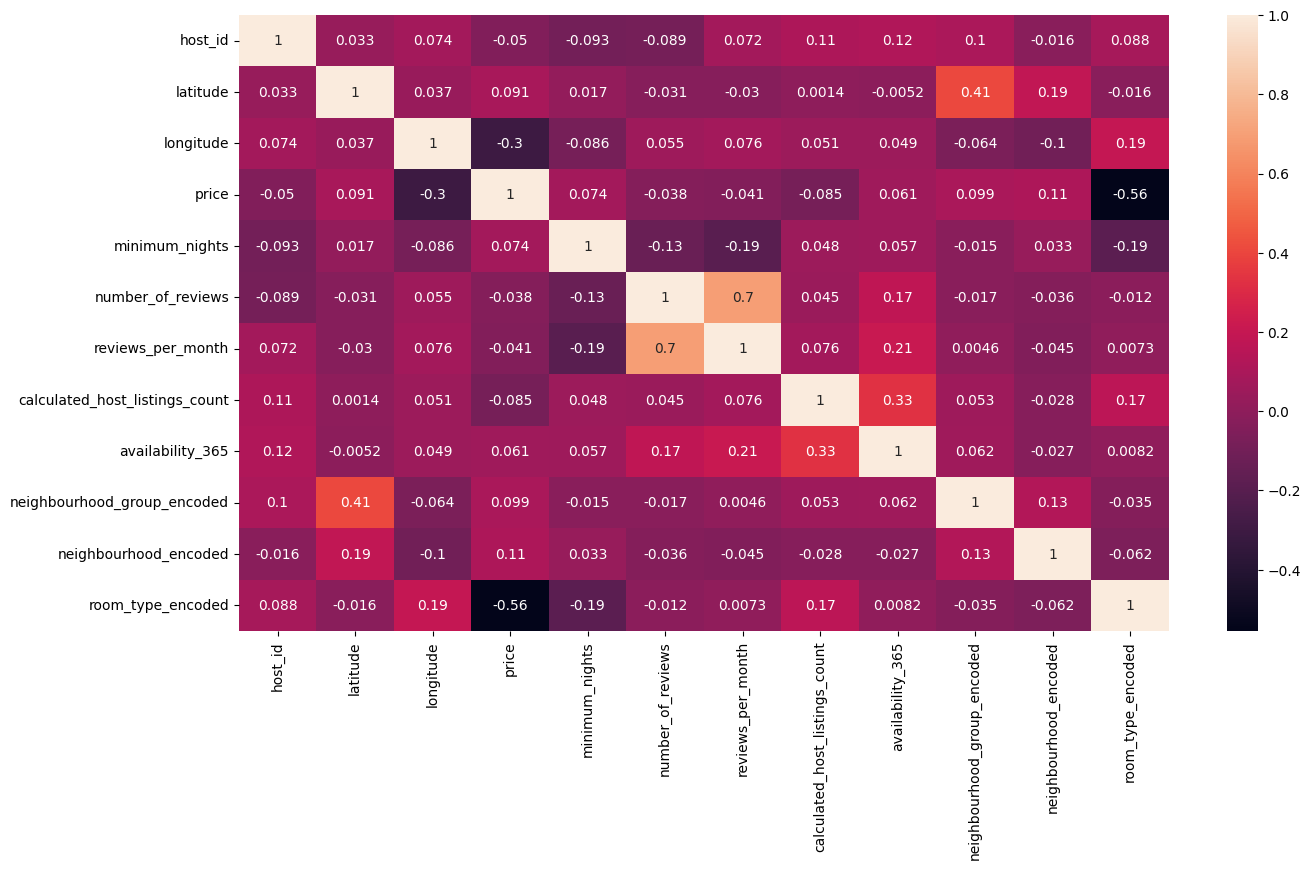

In [18]:
corr = df.drop(columns = ['neighbourhood_group', 'neighbourhood', 'room_type']).corr(method='kendall') # kendall digunakan karena memperhatikan bahwa asumsi nya data tidak berdistribusi Normal, dan kenall tidak berpengaruh pada outlier
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# EDA & Visualization

## Feature Engineering for Price Group

In [19]:
import pandas as pd

# Membuat kolom baru 'price_group' dengan kategori ordinal
df['price_group'] = pd.cut(df['price'],
                           bins=[0, 50, 250, 500, 750, 1000, float('inf')],
                           labels=['Sangat Murah', 'Murah', 'Sedang', 'Mahal', 'Sangat Mahal', 'Ekstra Mahal'],
                           right=False).astype(str)

<BarContainer object of 6 artists>

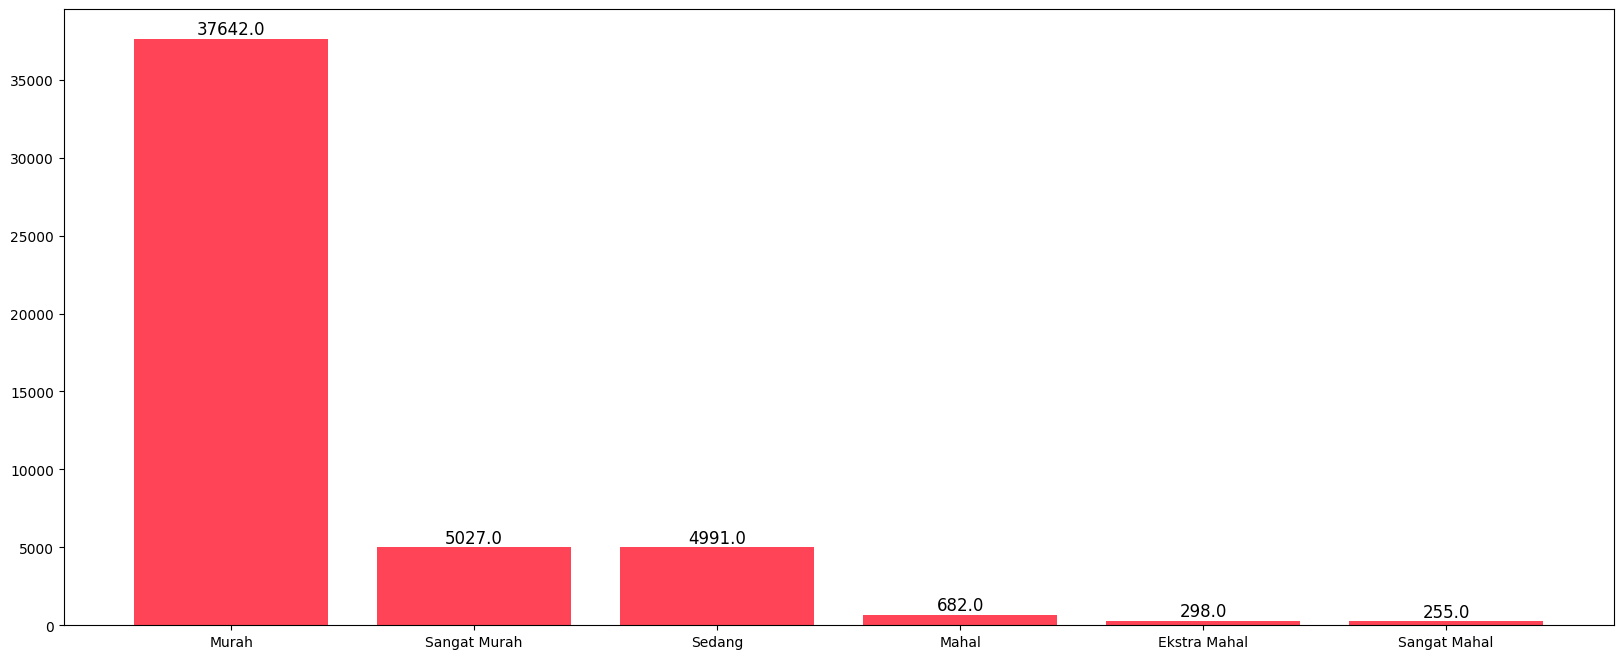

In [20]:
x = df['price_group'].value_counts().index
y = df['price_group'].value_counts().values
plt.figure(figsize=(20,8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.5, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.bar(x,y,color = "#FF4457")

## Qualitative Variables Frequency Distribution Tables

In [60]:
freq_location = df['neighbourhood_group'].value_counts().reset_index()
# Menghitung persentase untuk setiap nilai
freq_location['Percent'] = (freq_location['count'] / np.sum(freq_location['count'])) * 100
freq_location.columns = ['neighbourhood_group', 'Frequency', 'Percent']

# Mengurutkan berdasarkan frekuensi
freq_location = freq_location.sort_values(by='Frequency', ascending = False)
freq_location

,neighbourhood_group,Frequency,Percent
0,Manhattan,21661,44.301053
1,Brooklyn,20104,41.116679
2,Queens,5666,11.588097
3,Bronx,1091,2.231312
4,Staten Island,373,0.762859


In [61]:
freq_neighbourhood = df['neighbourhood'].value_counts().reset_index()
# Menghitung persentase untuk setiap nilai
freq_neighbourhood['Percent'] = (freq_neighbourhood['count'] / np.sum(freq_neighbourhood['count'])) * 100
freq_neighbourhood.columns = ['neighbourhood', 'Frequency', 'Percent']

# Mengurutkan berdasarkan frekuensi
freq_neighbourhood = freq_neighbourhood.sort_values(by='Frequency', ascending = False)
top_5_freq_neighbourhood = freq_neighbourhood.head()
top_5_freq_neighbourhood

,neighbourhood,Frequency,Percent
0,Williamsburg,3920,8.017180
1,Bedford-Stuyvesant,3714,7.595869
2,Harlem,2658,5.436139
3,Bushwick,2465,5.041415
4,Upper West Side,1971,4.031087


In [62]:
freq_price_group = df['price_group'].value_counts().reset_index()
# Menghitung persentase untuk setiap nilai
freq_price_group['Percent'] = (freq_price_group['count'] / np.sum(freq_price_group['count'])) * 100
freq_price_group.columns = ['price_group', 'Frequency', 'Percent']

# Mengurutkan berdasarkan frekuensi
freq_price_group = freq_price_group.sort_values(by='Frequency', ascending = False)
freq_price_group.head()

,price_group,Frequency,Percent
0,Murah,37642,76.985377
1,Sangat Murah,5027,10.281215
2,Sedang,4991,10.207588
3,Mahal,682,1.394826
4,Ekstra Mahal,298,0.609469


## Count of Neighbourhood Group and Room Type

In [21]:
def labeled_countplot(data, x=None, hue=None, palette=None):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x=x, hue=hue, palette=palette, legend=False)

    # Menambahkan label di setiap bar
    if x:
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')
        ax.set_xlabel(x)

    plt.title(f'Countplot of {x if x else y}')
    plt.show()

<ipython-input-21-f5fa7c7d4072>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x, hue=hue, palette=palette, legend=False)


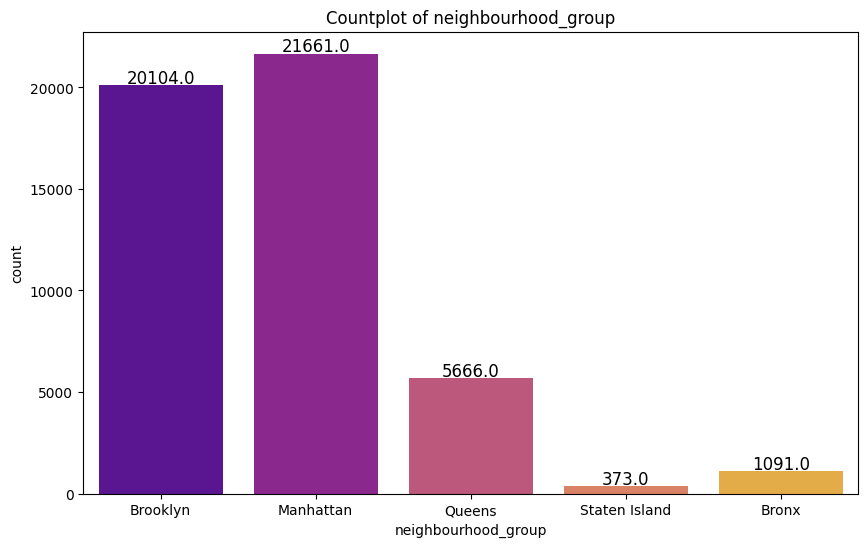

In [22]:
# pemanggilan fungsi
labeled_countplot(data=df, x='neighbourhood_group', palette="plasma")

<ipython-input-21-f5fa7c7d4072>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x, hue=hue, palette=palette, legend=False)


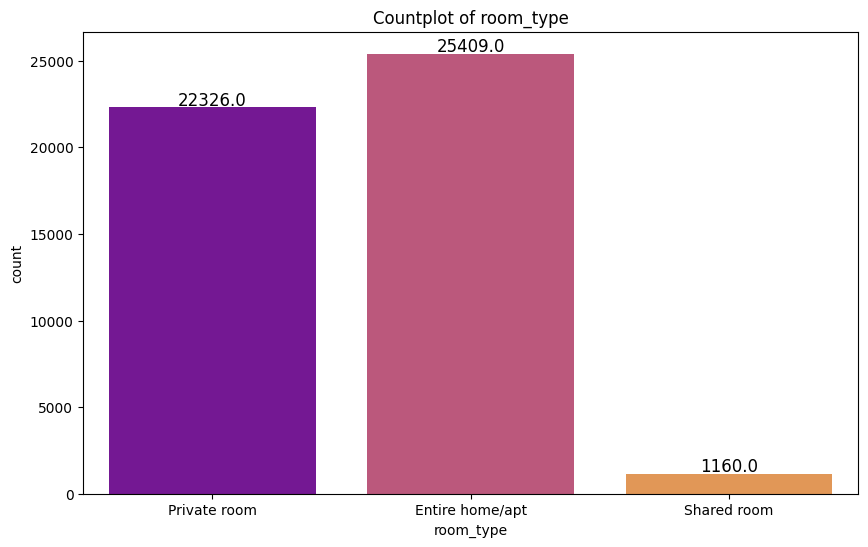

In [23]:
# pemanggilan fungsi
labeled_countplot(data=df, x='room_type', palette="plasma")

## Plot Availability_365 for Each Neighbourhood Group

<ipython-input-24-4cf108017436>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='availability_365', y='neighbourhood_group', palette='plasma', legend=False)


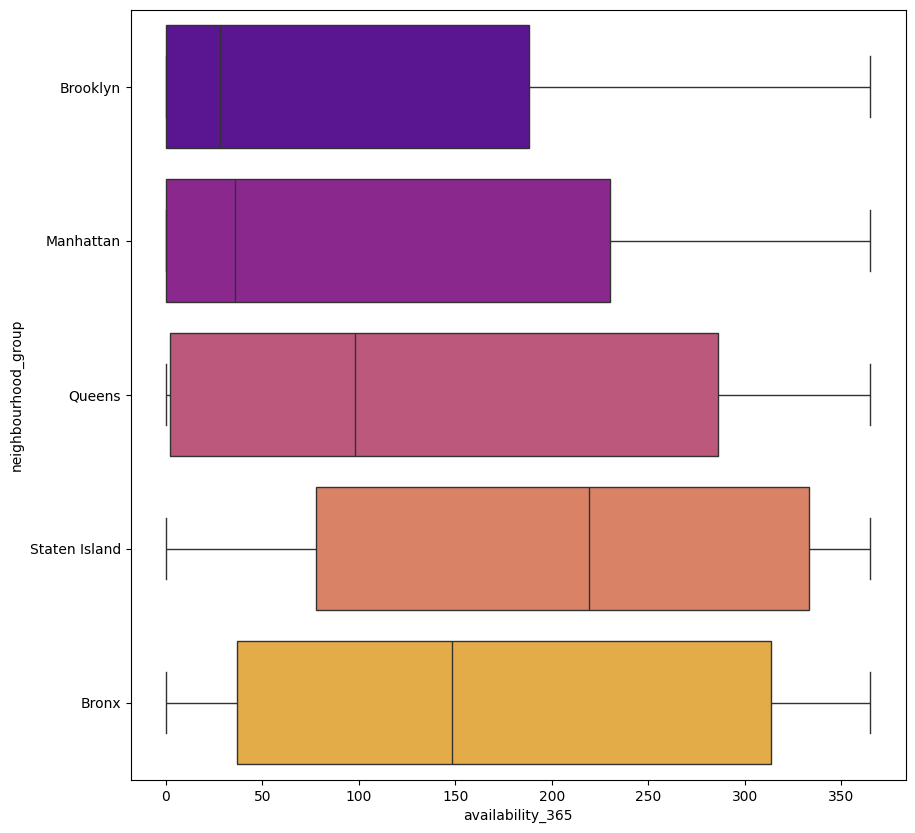

In [24]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=df, x='availability_365', y='neighbourhood_group', palette='plasma', legend=False)

## Top 10 neighborhoods with the most Airbnb properties

<ipython-input-25-53ac39805d0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette="plasma")


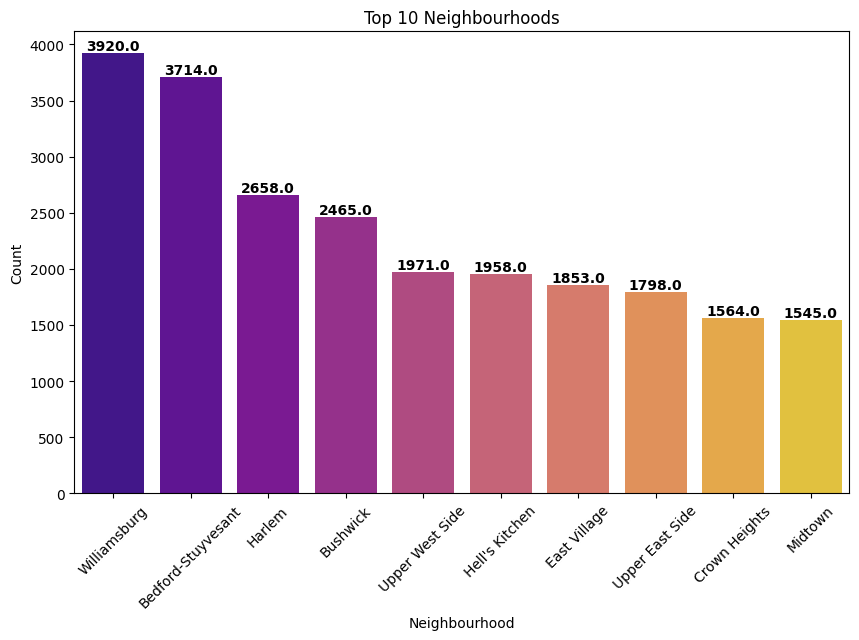

In [25]:
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette="plasma")
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 10 Neighbourhoods')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points', fontweight='bold')

plt.xticks(rotation=45)
plt.show()

## Price Analysis for Airbnb on Services

Kolom "availability_365" berarti jumlah hari saat listing tersedia untuk pemesanan. Artinya jumlah hari akomodasi tersebut beroperasi sepanjang tahun. Di sini nilai 0 berarti akomodasi yang sudah satu tahun tidak dioperasikan sehingga dihilangkan.

In [26]:
df_airbnb_onservice = df.drop(df[df['availability_365']==0].index,axis=0)
df_airbnb_onservice = df_airbnb_onservice.reset_index()

In [27]:
df_airbnb_onservice.shape, df.shape

print(f"Sampai sini kita tahu bahwa Airbnb/home accommodation yang tersedia adalah: {df.shape[0] - df_airbnb_onservice.shape[0]} properti")

Sampai sini kita tahu bahwa Airbnb/home accommodation yang tersedia adalah: 17533 properti


In [28]:
from PIL import Image

In [29]:
def eda_map(df,feature, ax):
    plt.figure(figsize=(15,15))
    image = Image.open(dataPath + "New_York_City_.png") # Load the image
    df.plot(kind='scatter', x='longitude', y='latitude', label='AirBnB On service', c=str(feature), ax=ax, # Create the scatter plot
            cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5, s=1)
    ax.imshow(image,extent=[-74.258, -73.7, 40.49,40.92]) # Set the extent of the image

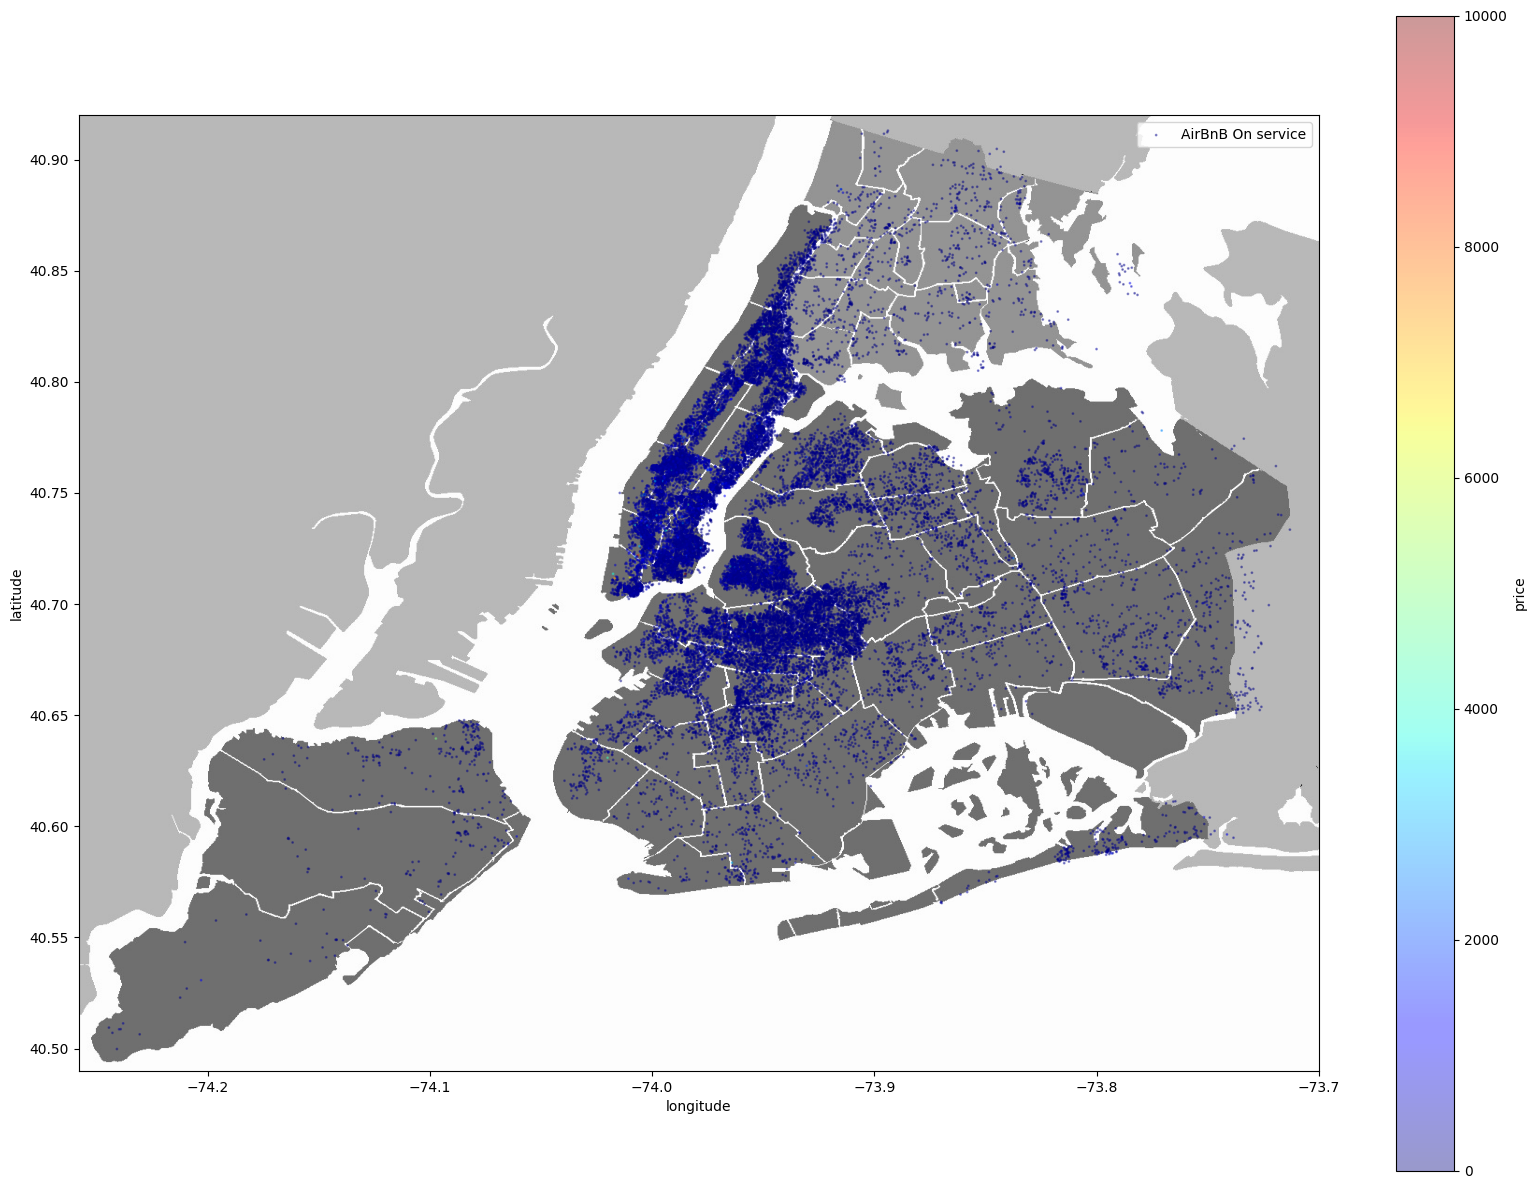

<Figure size 1500x1500 with 0 Axes>

In [30]:
plt.figure(figsize=(20,15))
ax = plt.gca()
eda_map(df_airbnb_onservice,'price',ax)

Kita dapat mengetahui tentang semua tempat layanan Airbnb dari Grafik map di atas. Tapi sulit untuk menilai tempat mana yang panas/murah/mahal dll.

Informasi lebih lanjut dapat diperoleh dengan cara memisahkan bagian-bagian tersebut dengan beberapa neighbourhood_group nya.

In [32]:
nyc_sub = df_airbnb_onservice.neighbourhood_group.unique().tolist()
y = []

for i in nyc_sub:
    y.append(df_airbnb_onservice[df_airbnb_onservice['neighbourhood_group']==i]['price'].values.tolist())

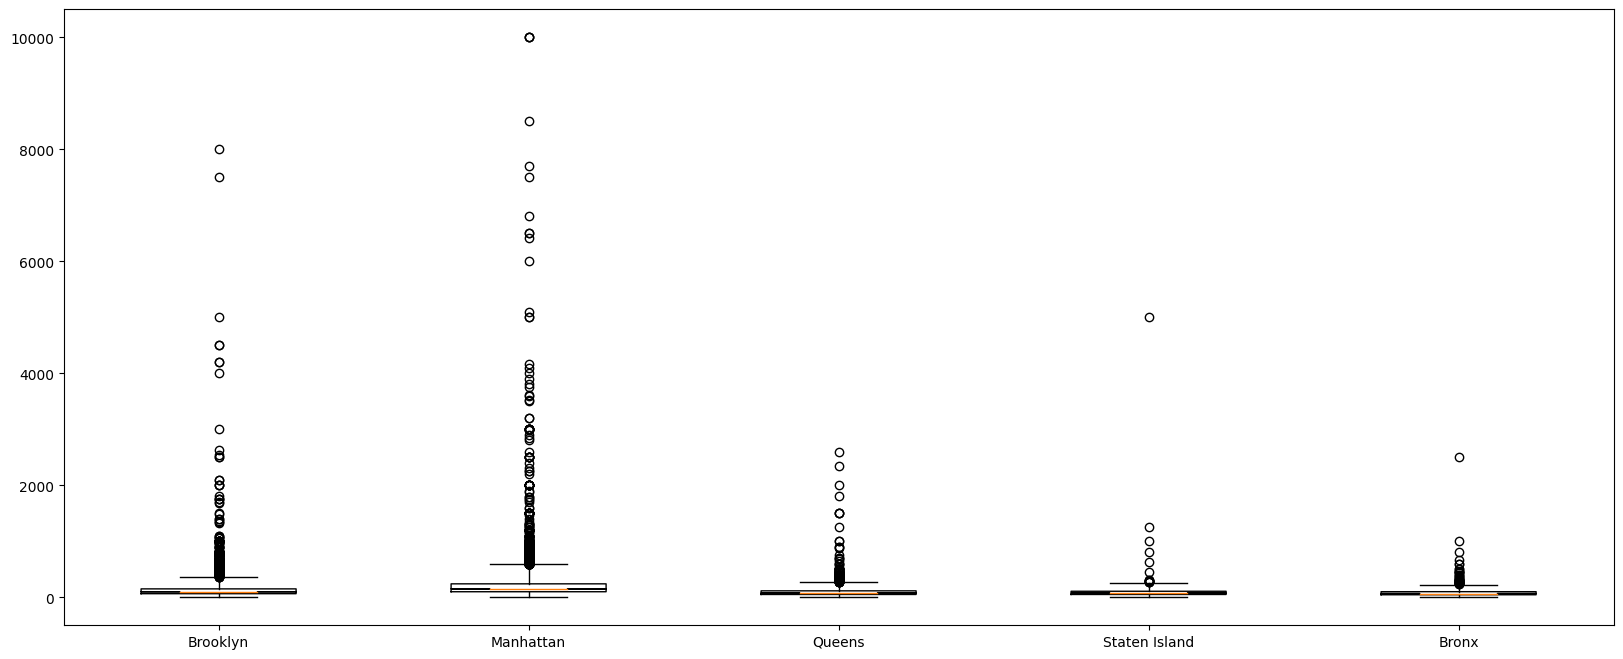

In [33]:
plt.figure(figsize=(20,8))
plt.boxplot(y,notch=True, whis=2.5)
plt.xticks([1, 2, 3,4,5], nyc_sub);

Agar lebih komprehensif dalam visualisasinya disini akan dilakukan pengelompokkan harga menjadi beberapa kelompok. Ditemukan bahwa sebagian besar harga didistribusikan pada 0~1000 dolar. Jadi saya membagi unit 100 dolar dari 0-1000 dolar untuk melihat distribusi harga lebih spesifik.

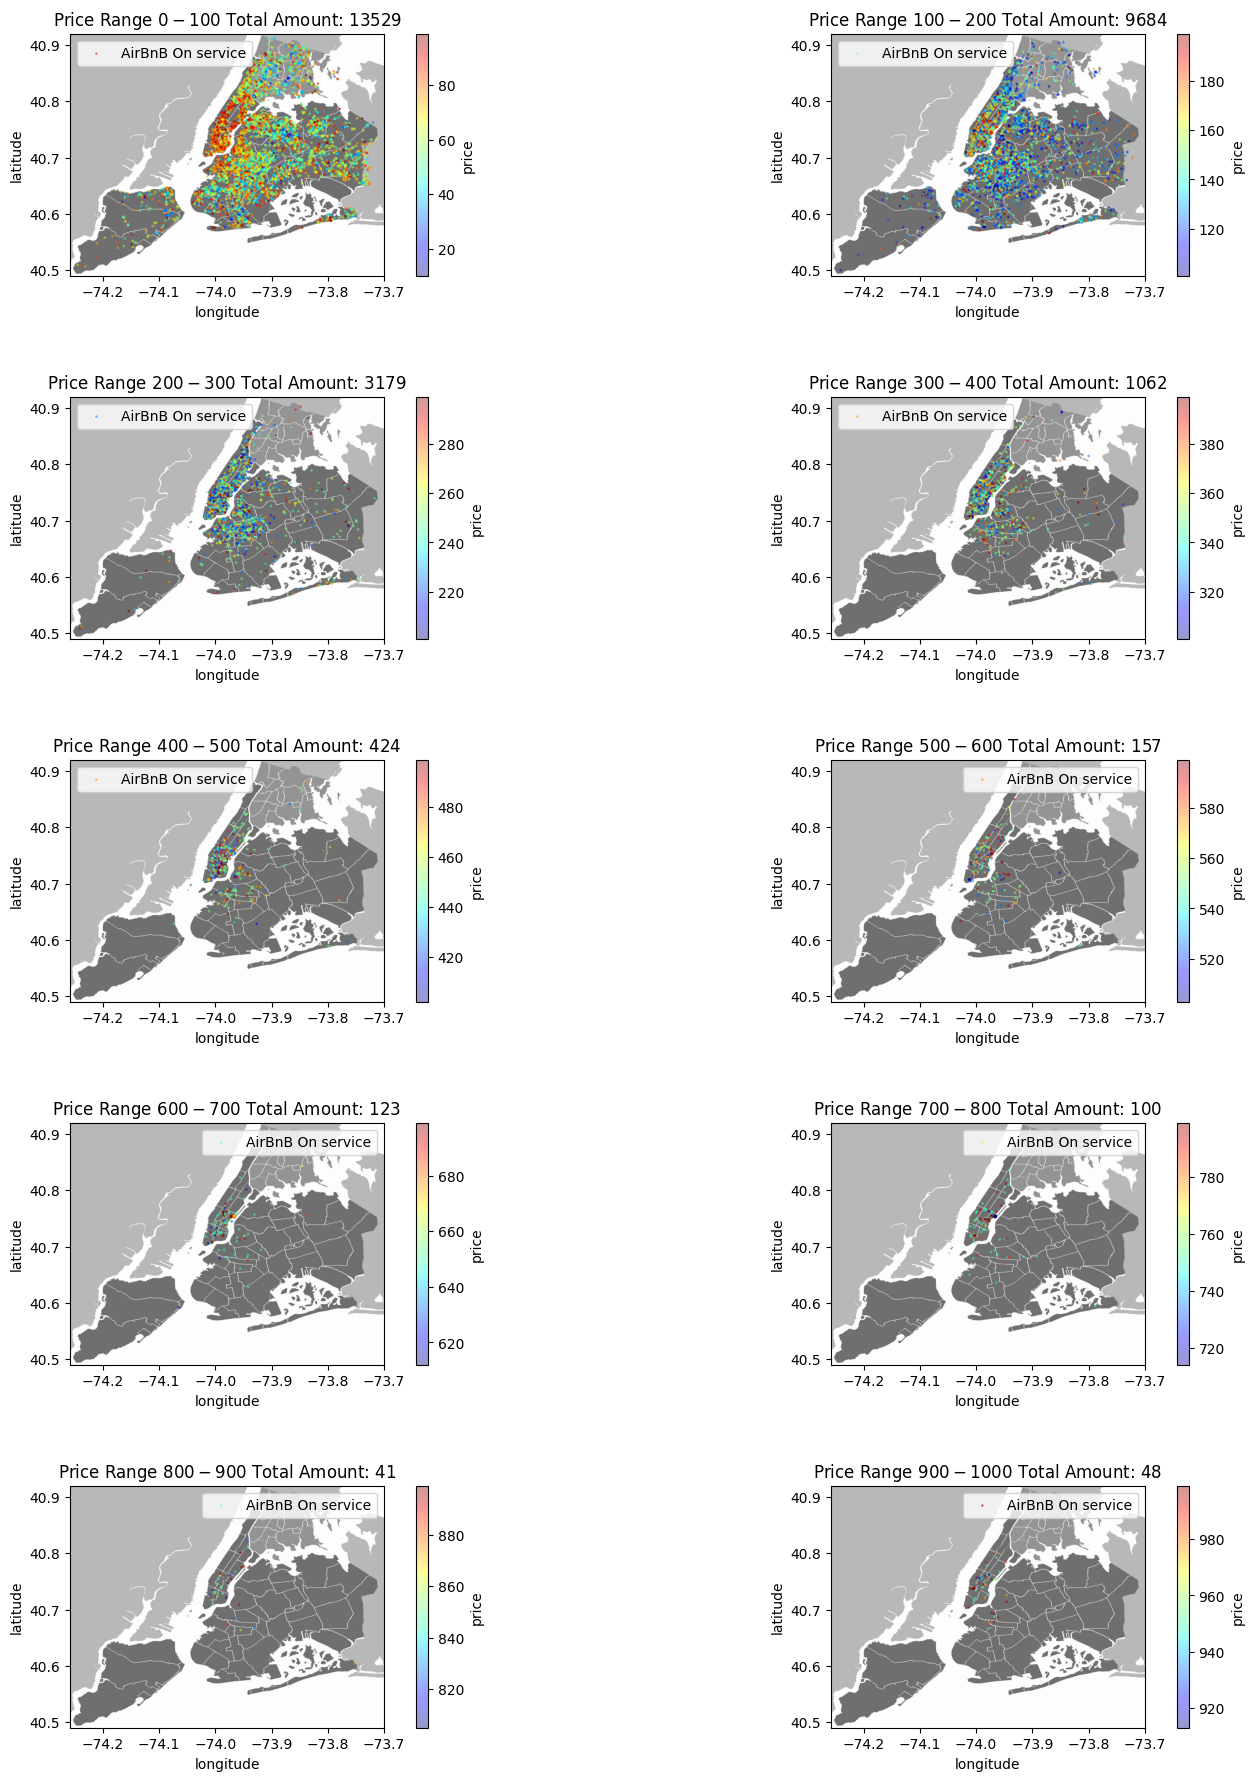

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [34]:
price_range = 0
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 22), gridspec_kw={'hspace': 0.5, 'wspace': 0.2})
for row in axes:
    for ax in row:
        if price_range < 10000:
            eda_map(df_airbnb_onservice[(df_airbnb_onservice['price'] > price_range*100) & (df_airbnb_onservice['price'] < (price_range+1)*100)], 'price',ax)
            ax.set_title(f"Price Range ${price_range*100} - ${(price_range+1)*100} Total Amount: {len(df_airbnb_onservice[(df_airbnb_onservice['price'] > price_range*100) & (df_airbnb_onservice['price'] < (price_range+1)*100)])}")
            price_range += 1

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace= -0.5)
plt.show()


## Analyze each place's room to room distance

Menurut data resmi dari New York City Planning, berikut adalah luas wilayah dari masing-masing borough di New York City:

1. Manhattan Area: 59.1 square kilometers (22.8 square miles)
2. Brooklyn Area: 183.4 square kilometers (70.8 square miles)
3. Queens Area: 464.9 square kilometers (179.2 square miles)
4. Bronx Area: 109.0 square kilometers (42.0 square miles)
5. Staten Island Area: 151.5 square kilometers (58.5 square miles)

In [35]:
suburb_area = [183400000, 59100000,464900000, 183400000,151500000 ,109000000]
distance_room_to_room = []

for i, city in enumerate(nyc_sub):
    distance_room_to_room.append((suburb_area[i]/len(df[df['neighbourhood_group'] == city]))*(1/1000)) # luas kota/banyaknya airbnb property setiap neighbourhood group*(1/1000) untuk convert ke kilometer persegi

<BarContainer object of 5 artists>

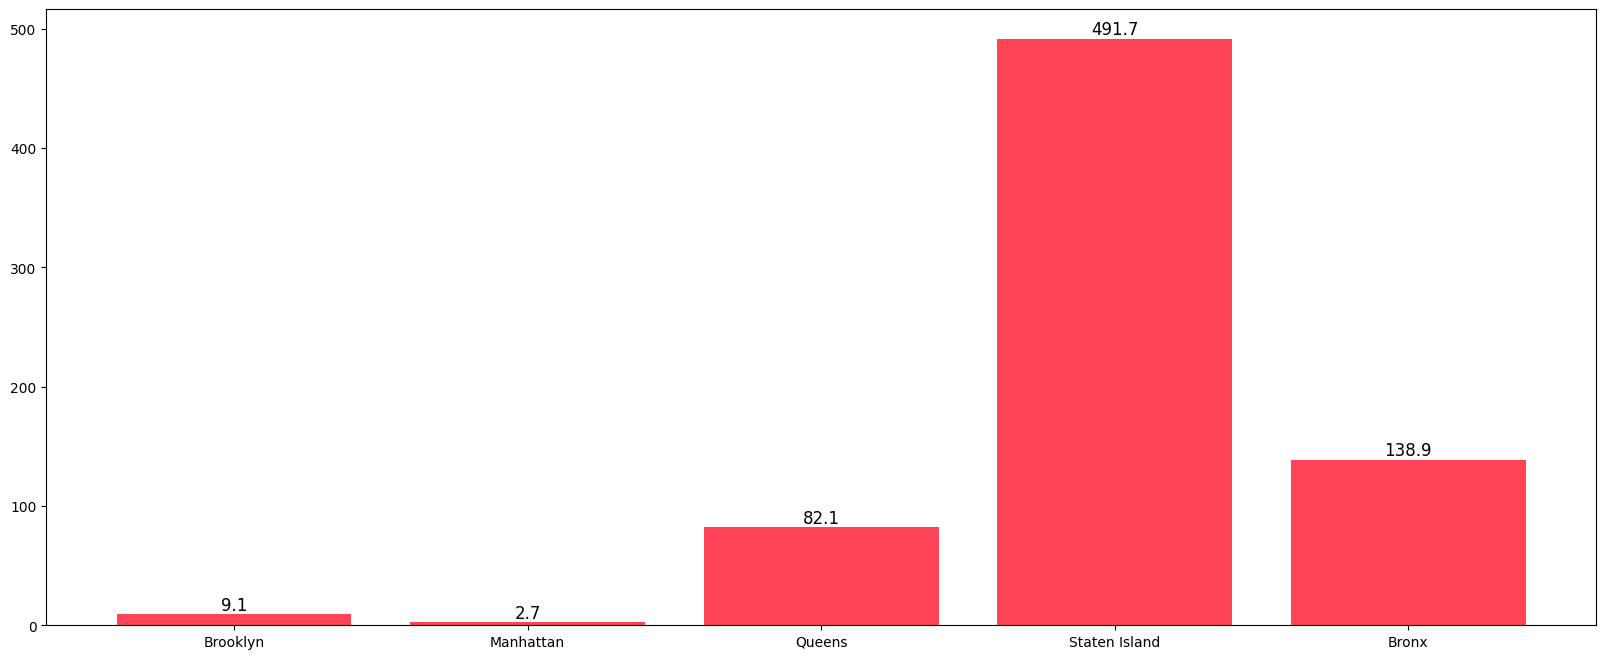

In [36]:
plt.figure(figsize=(20,8))
for i in range(len(nyc_sub)):
    height = distance_room_to_room[i]
    plt.text(nyc_sub[i], height, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.bar(nyc_sub,distance_room_to_room,color = "#FF4457")

# Model Clustering

In [66]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_encoded', 'neighbourhood_encoded',
       'room_type_encoded', 'price_group'],
      dtype='object')

In [67]:
df_cluster = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_encoded', 'neighbourhood_encoded', 'room_type_encoded', 'price_group']]

In [73]:
label_encoder = LabelEncoder()

df_cluster["price_group"] = label_encoder.fit_transform(df_cluster["price_group"])

## PCA for Dimensionality Reduction

In [80]:
from sklearn.decomposition import PCA

# Initialize the PCA model with the desired number of components
pca = PCA(n_components=0.95)

# Fit and transform the data
transformed_data = pca.fit_transform(df_cluster)

# Buat DataFrame dengan kolom PCA-1, PCA-2, dst.
column_names = [f'PCA-{i}' for i in range(1, transformed_data.shape[1] + 1)]
hasil_pca_sklearn = pd.DataFrame(data=transformed_data, columns=column_names)

In [81]:
explained_variances = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variances)

# Total explained variance
total_explained_variance = sum(explained_variances)
print("Total explained variance:", total_explained_variance)

Explained variance ratios: [0.69535556 0.20793734 0.05645897]
Total explained variance: 0.9597518719625006


## Elbow Method

In [83]:
from sklearn.cluster import KMeans

In [84]:
inersia_values = []
for i in range(1, 16):
    kmeans_std = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)
    kmeans_std.fit(hasil_pca_sklearn)
    inersia_values.append(kmeans_std.inertia_)

In [85]:
inersia_values

[3905185719.3226614,
 2468408551.372328,
 1721084727.1763706,
 1210509795.4101715,
 922192030.5960073,
 791121747.9841671,
 737837053.4945393,
 606021623.1638678,
 536581509.4073769,
 484946500.2197009,
 422996992.6178828,
 389428189.25417364,
 353399383.0808436,
 327309645.3432428,
 309161088.7889215]

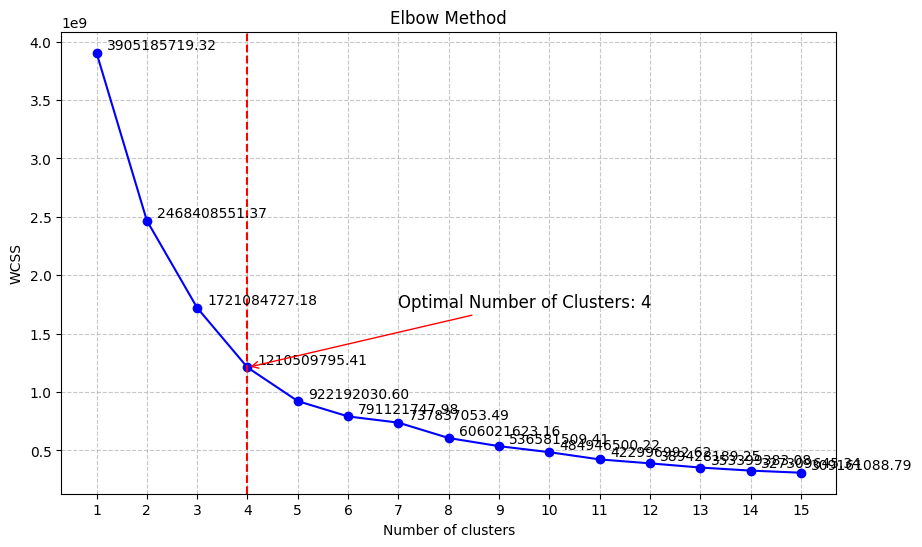

In [91]:
# Plot Elbow Method with Labels
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inersia_values, marker='o', linestyle='-', color='b')

# Menambahkan label untuk setiap titik data
for i, inertia in enumerate(inersia_values):
    plt.text(i + 1.2, inertia, f'{inertia:.2f}', ha='left', va='bottom', fontsize=10)


plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Add a vertical line indicating the number of clusters
n_clusters_g = 4
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Number of Clusters: {n_clusters_g}')
plt.annotate(f'Optimal Number of Clusters: {n_clusters_g}', xy=(n_clusters_g, inersia_values[n_clusters_g-1]), xytext=(n_clusters_g+3, inersia_values[n_clusters_g-2]),  # Menggeser teks ke kanan
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)

plt.xticks(range(1, 16))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Silhoutte Analysis

In [92]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [93]:
# def silhouette_analysis(df):
#     lst_silhouette_avg =[]
#     range_n_clusters = [i for i in range(2, 17)]
#     for num_clusters in range_n_clusters:

#         # Initialize KMeans
#         kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#         kmeans.fit(df)
#         cluster_labels = kmeans.labels_

#         # Silhouette Score
#         silhouette_avg = silhouette_score(df, cluster_labels)
#         print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
#         lst_silhouette_avg.append(silhouette_avg)
#     return lst_silhouette_avg

In [96]:
# lst_silhouette_avg_1 = silhouette_analysis(hasil_pca_sklearn)

In [97]:
# def plot_silhouette_analysis(lst_silhouette_avg):
#     plt.plot(range(2, 17), lst_silhouette_avg, marker='o', linestyle='-')
#     plt.title('Silhouette Analysis')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('Silhouette Score')
#     plt.xticks(range(2, 17))
#     plt.grid(True, linestyle='--', alpha=0.7)
#     # Menambahkan label untuk setiap titik data
#     for i, score in enumerate(lst_silhouette_avg):
#         plt.annotate(f'{score:.2f}', (i+2, score), textcoords="offset points", xytext=(0,10), ha='center')

#     plt.show()

In [98]:
# plot_silhouette_analysis(lst_silhouette_avg_1)

## K-Means wit optimizer n-cluster

In [99]:
# Apply K-means clustering
km_optimaze_k = KMeans(random_state = 70, n_clusters = 4, init = 'k-means++', n_init = 'auto', max_iter = 1000, tol = 0.0001)

In [100]:
km_optimaze_k.fit(hasil_pca_sklearn)

KMeans(max_iter=1000, n_clusters=4, n_init='auto', random_state=70)

In [101]:
predicted_labels = km_optimaze_k.labels_

In [102]:
from collections import Counter
# Menggunakan Counter untuk menghitung kemunculan setiap nilai
label_counts = Counter(predicted_labels)
# Menampilkan hasil perhitungan
label_counts

Counter({3: 15768, 1: 31710, 0: 1360, 2: 57})

In [103]:
import plotly.express as px

# Konversi data Counter ke DataFrame Pandas
labels, counts = zip(*label_counts.items())
df_label = pd.DataFrame({'Label': labels, 'Count': counts})

# Buat plot interaktif dengan plotly
fig = px.bar(df_label, x='Label', y='Count', text='Count', title='Count of Labels')
fig.update_traces(textposition='outside')
fig.show()

## Evaluasi Model

In [104]:
# Menghitung beberapa metrik evaluasi lainnya
silhouette_1 = silhouette_score(hasil_pca_sklearn, km_optimaze_k.labels_)
db_index_1 = davies_bouldin_score(hasil_pca_sklearn, km_optimaze_k.labels_)
ch_index_1 = calinski_harabasz_score(hasil_pca_sklearn, km_optimaze_k.labels_)

print(f"Silhouette Score: {silhouette_1}")
print(f"Davies-Bouldin Index: {db_index_1}")
print(f"Calinski-Harabasz Index: {ch_index_1}")

Silhouette Score: 0.4740669894405219
Davies-Bouldin Index: 0.7345545265817063
Calinski-Harabasz Index: 36278.2182326989


In [105]:
from sklearn.metrics import silhouette_samples, davies_bouldin_score, calinski_harabasz_score

# Hitung Silhouette Score untuk setiap sampel
silhouette_samples_1 = silhouette_samples(hasil_pca_sklearn, km_optimaze_k.labels_)

# Loop melalui setiap cluster untuk menampilkan nilai evaluasi
for cluster_idx in range(km_optimaze_k.n_clusters):
    cluster_silhouette_avg = np.mean(silhouette_samples_1[km_optimaze_k.labels_ == cluster_idx])
    print(f"Cluster {cluster_idx}:")
    print(f"  Silhouette Score: {cluster_silhouette_avg}")

Cluster 0:
  Silhouette Score: 0.2512078848148213
Cluster 1:
  Silhouette Score: 0.5177969350921584
Cluster 2:
  Silhouette Score: 0.3751113352857562
Cluster 3:
  Silhouette Score: 0.40570399337027746


## Final Result

In [107]:
df_original_with_cluster = df.copy()
df_original_with_cluster['cluster'] = km_optimaze_k.labels_

In [108]:
dataPath

'/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis/Dataset/'

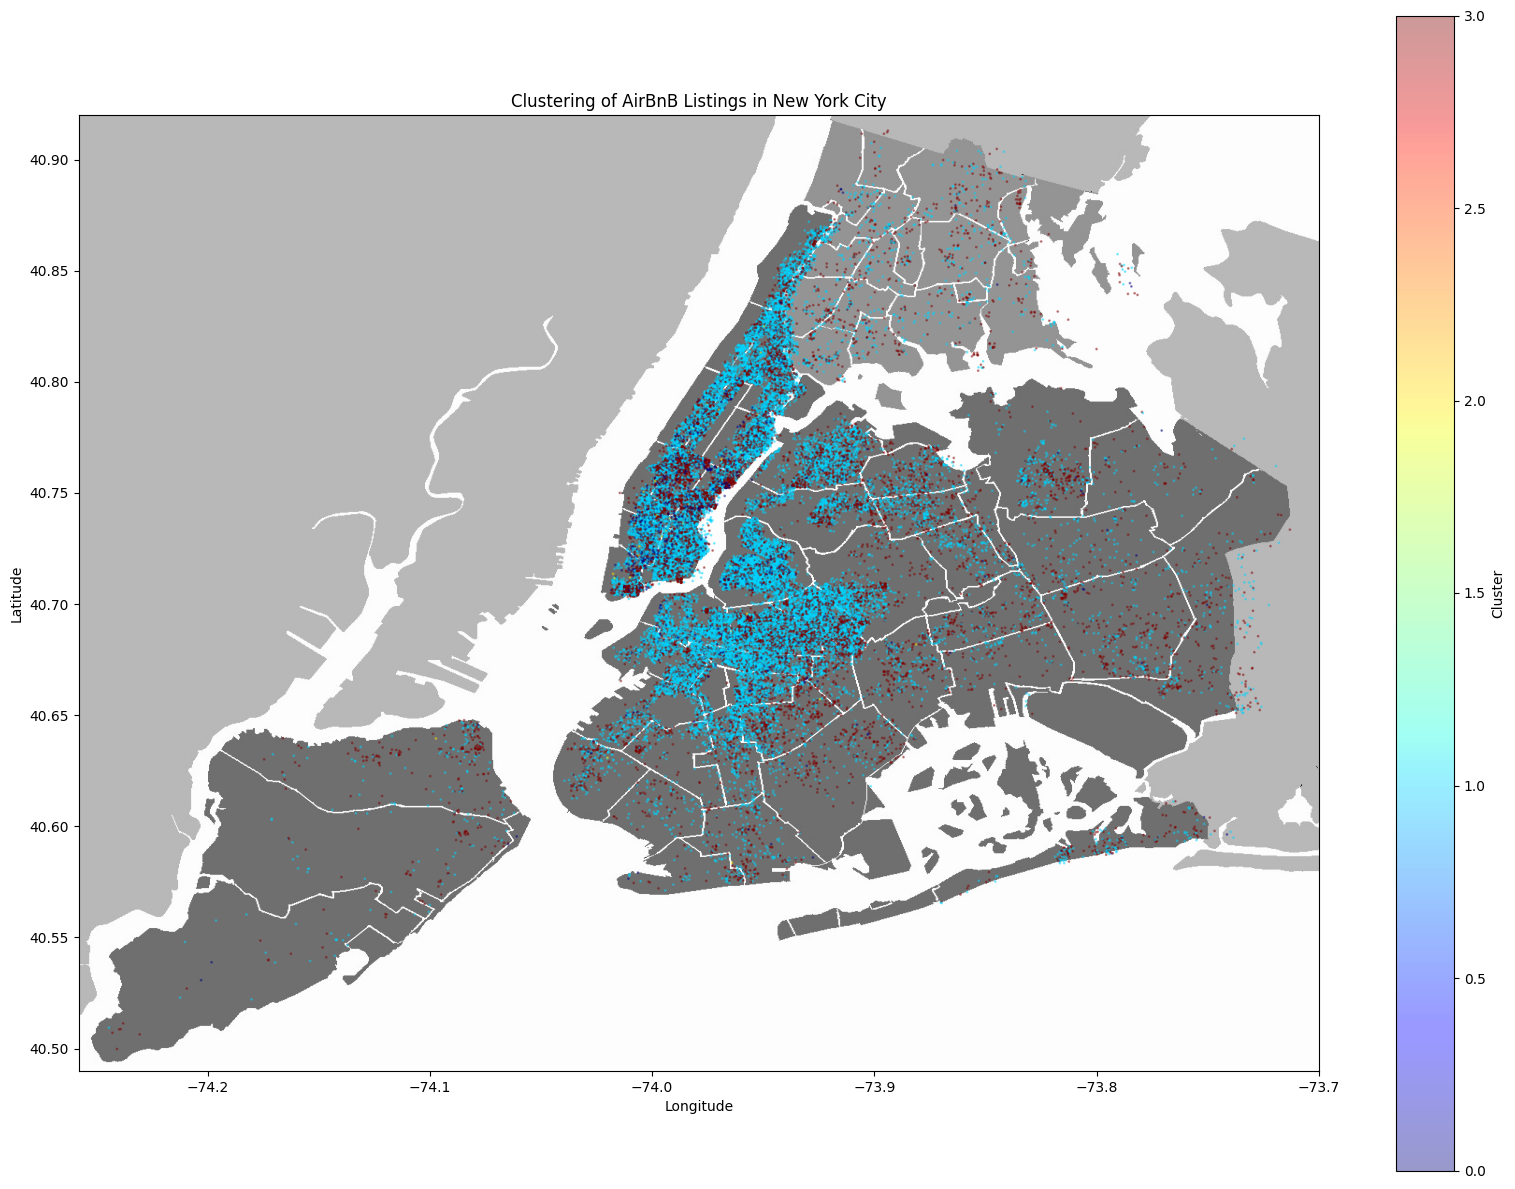

In [109]:
image_path = dataPath + "New_York_City_.png"
image = Image.open(image_path)

# Buat figure dan axes
plt.figure(figsize=(20, 15))
ax = plt.gca()

# Tampilkan gambar peta
extent = [-74.258, -73.7, 40.49, 40.92]  # Sesuaikan extent ini sesuai dengan lokasi gambar
ax.imshow(image, extent=extent)

# Scatter plot data cluster
scatter = ax.scatter(df_original_with_cluster['longitude'], df_original_with_cluster['latitude'],
                     c=df_original_with_cluster['cluster'], cmap=plt.get_cmap('jet'), alpha=0.4, zorder=5, s=1)

# Tambahkan color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Label dan judul plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of AirBnB Listings in New York City')

# Tampilkan plot
plt.show()

refrensi :

https://www.kaggle.com/code/kagleo123/newyork-city-airbnb-eda#-%E2%AD%95Check-Missing-Value

https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data
